# checking LO files for ariane troubleshooting

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d = xr.open_dataset('/data1/parker/LO_roms/cas6_v1_live/f2023.08.01/ocean_his_0003.nc')

In [3]:
x = [288,289,290]
y = [953,954,955]

X, Y = np.meshgrid(x,y)
X = X.flatten()
Y = Y.flatten()

u = [np.round(d.u[0,0,Y[i],X[i]].values,3) for i in range(len(X))]
v = [np.round(d.v[0,0,Y[i],X[i]].values,3) for i in range(len(X))]
w = [np.round(d.w[0,0,Y[i],X[i]].values,3) for i in range(len(X))]

Text(0.5, 1.0, 'w')

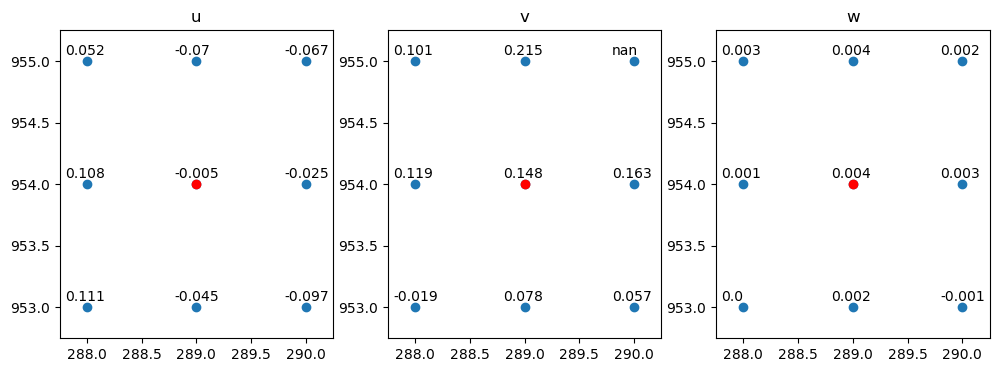

In [4]:
fig, ax = plt.subplots(1,3,figsize =[12,4])

for i in range(len(ax)):
    ax[i].scatter(X,Y)
    ax[i].scatter(289,954,color='r',zorder=2)
    ax[i].set_ylim([952.75,955.25])
    ax[i].set_xlim([287.75,290.25]) 

for i, txt in enumerate(u):
    ax[0].annotate(txt, (X[i]-0.2, Y[i]+0.05))
ax[0].set_title('u')

for i, txt in enumerate(v):
    ax[1].annotate(txt, (X[i]-0.2, Y[i]+0.05))
ax[1].set_title('v')

for i, txt in enumerate(w):
    ax[2].annotate(txt, (X[i]-0.2, Y[i]+0.05))
ax[2].set_title('w')

In [5]:
for i in range(len(d.s_rho)):
    u = np.round(d.u[0,i,955,290].values,3) 
    v = np.round(d.v[0,i,955,290].values,3) 
    w = np.round(d.w[0,i,955,290].values,3) 

    print("u= "+str(u)+", v= "+str(v)+", w= "+str(w))

u= -0.067, v= nan, w= 0.002
u= -0.073, v= nan, w= 0.002
u= -0.078, v= nan, w= 0.003
u= -0.112, v= nan, w= 0.003
u= -0.13, v= nan, w= 0.004
u= -0.112, v= nan, w= 0.004
u= -0.077, v= nan, w= 0.004
u= -0.047, v= nan, w= 0.004
u= -0.039, v= nan, w= 0.004
u= -0.055, v= nan, w= 0.004
u= -0.069, v= nan, w= 0.004
u= -0.115, v= nan, w= 0.004
u= -0.143, v= nan, w= 0.004
u= -0.152, v= nan, w= 0.004
u= -0.158, v= nan, w= 0.004
u= -0.139, v= nan, w= 0.004
u= -0.109, v= nan, w= 0.004
u= -0.081, v= nan, w= 0.003
u= -0.061, v= nan, w= 0.003
u= -0.038, v= nan, w= 0.003
u= -0.025, v= nan, w= 0.002
u= -0.007, v= nan, w= 0.002
u= 0.001, v= nan, w= 0.002
u= 0.017, v= nan, w= 0.001
u= 0.024, v= nan, w= 0.001
u= 0.037, v= nan, w= 0.001
u= 0.043, v= nan, w= 0.001
u= 0.054, v= nan, w= 0.0
u= 0.061, v= nan, w= 0.0
u= 0.074, v= nan, w= 0.0


# where is this nan in the model?

/tmp/ipykernel_153773/1979407392.py:8: UserWarning: linewidths is ignored by contourf
  ax.contourf(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')


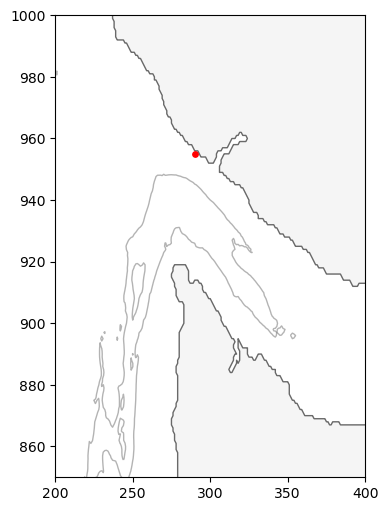

In [4]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')


fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

ax.set_ylim([850,1000])
ax.set_xlim([200,400])

ax.scatter(290,955,color='r',s=15, zorder=2)

# ax.scatter()

#### have it working now! 
the problem was the grid, fine that v is nan there bc it is on the coast - it was Ariane that was having rouble with the ROMS grid not the model that was the problem. Fixed by setting where nan replace with 0 in ariane "sub_input_data_seq_main()"

## check if test run looks good:

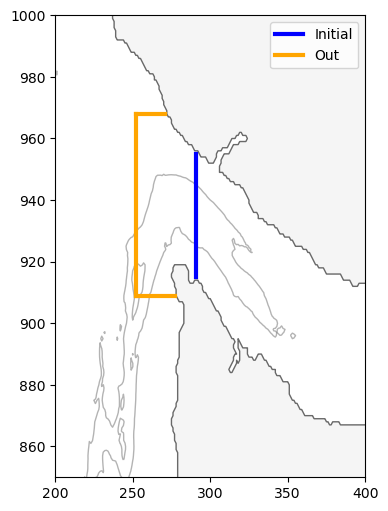

In [5]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

ax.plot([291,291],[915,955],linewidth=3,c='b',label='Initial')
ax.plot([252,277],[909,909],linewidth=3,c='orange',label='Out')
ax.plot([252,271],[968,968],linewidth=3,c='orange')
ax.plot([252,252],[909,968],linewidth=3,c='orange')
ax.legend()

ax.set_ylim([850,1000])
ax.set_xlim([200,400]);

In [8]:
run = xr.open_dataset('/data1/bbeutel/LO_user/ariane/test/for_20180101/ariane_positions_quantitative.nc')

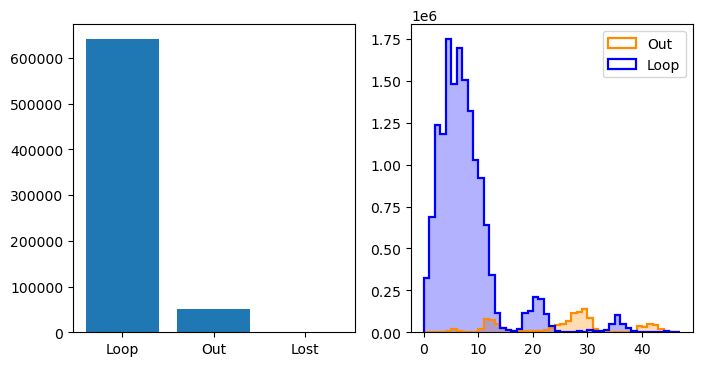

In [9]:
to_hours = (1.15741*10**-14)*24
colours = ['b', 'darkorange']

fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].bar(['Loop','Out','Lost'],[np.sum(run.final_transp[run.final_section==0])/24,np.sum(run.final_transp[run.final_section==2])/24,np.sum(run.final_section[(run.final_section!=0)&(run.final_section!=2)])/24])

bins = np.arange(0,48,1)
n, _, _ = ax[1].hist([(run.final_age[run.final_section==0]*to_hours).astype(int), (run.final_age[run.final_section==2]*to_hours).astype(int)], 
                     bins=bins, weights=[run.final_transp[run.final_section==0], run.final_transp[run.final_section==2]], 
                     color = colours, label =['Loop','Out','Lost'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax[1].hist([(run.final_age[run.final_section==0]*to_hours).astype(int), (run.final_age[run.final_section==2]*to_hours).astype(int)], 
           bins=bins, weights=[run.final_transp[run.final_section==0], run.final_transp[run.final_section==2]], 
           color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax[1].legend()

#### looks like it worked!
## going to larger boundaries get a coast crash at x= 324, y= 960 and sometimes at x= 317, y= 825; x=330, y=732; x=332, y=789
Susan hypothesizes that this is a mismatch between the grid mask and the velocity file mask at this location (ie. u and/or v >0 at the coast) <br> 
Other thing of note is that this only happenned in the first and last day of the run..

(50.0, 400.0)

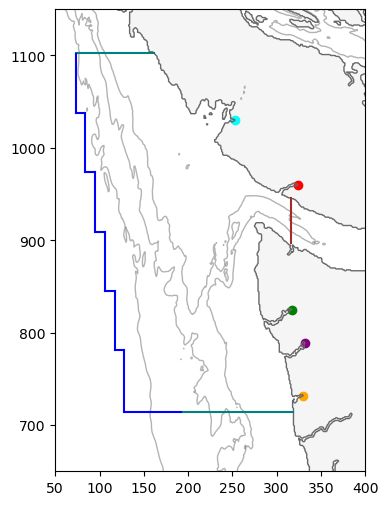

In [12]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the coast crash spots
ax.scatter([324],[960],c='r')
ax.scatter([317],[825],c='g')
ax.scatter([330],[732],c='orange')
ax.scatter([332],[789],c='purple')
ax.scatter([253],[1030],c='cyan')

# and the new boundaries
plt.plot([316,316], [897,946], c='brown')
plt.plot([ 73,162],[1103,1103], c='teal')
plt.plot([128,193],[ 714, 714], c='b')
plt.plot([117,128],[ 781, 781], c='b')
plt.plot([106,117],[ 845, 845], c='b')
plt.plot([ 95,106],[ 909, 909], c='b')
plt.plot([ 84, 95],[ 974, 974], c='b')
plt.plot([ 73, 84],[1038,1038], c='b')
plt.plot([ 73, 73],[1038,1102], c='b')
plt.plot([ 84, 84],[ 974,1038], c='b')
plt.plot([ 95, 95],[ 909, 974], c='b')
plt.plot([106,106],[ 845, 909], c='b')
plt.plot([117,117],[ 781, 845], c='b')
plt.plot([128,128],[ 714, 781], c='b')
plt.plot([194,319],[ 714, 714], c='teal')

ax.set_ylim([650,1150])
ax.set_xlim([50,400])

In [15]:
# mask first
# remember, 1 = water, 0 = land
print(grid.mask_u[960,324])
print(grid.mask_v[960,324])
print(grid.mask_rho[960,324])
# all agree that its land

<xarray.DataArray 'mask_u' ()>
array(0.)
<xarray.DataArray 'mask_v' ()>
array(0.)
<xarray.DataArray 'mask_rho' ()>
array(0.)


In [16]:
data = xr.open_dataset('/data1/parker/LO_roms/cas6_v0_live/f2018.03.09/ocean_his_0004.nc')
print(np.max(np.abs(data.v[0,:,960,324])).values)
print(np.max(np.abs(data.u[0,:,960,324])).values)
# makes sense, should be nan on land..

nan
nan


In [17]:
data = xr.open_dataset('/data1/parker/LO_roms/cas6_v0_live/f2018.03.09/ocean_his_0004.nc')
#first the v below and above
print(np.max(np.abs(data.v[0,:,959,324])).values)
print(np.max(np.abs(data.v[0,:,961,324])).values)


#and then the u left and right
print(np.max(np.abs(data.u[0,:,960,323])).values)
print(np.max(np.abs(data.u[0,:,960,325])).values)
# the u is sometimes a number instead of nan! ot the left of the cell

nan
nan
0.09019090980291367
nan


(310.0, 330.0)

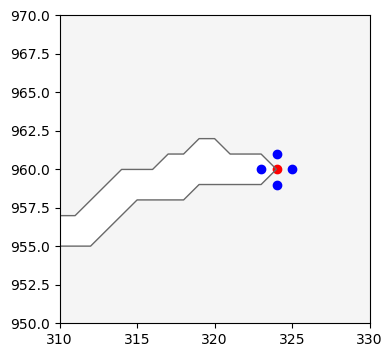

In [23]:
# zoom in on the point
fig, ax = plt.subplots(1,1,figsize=(4, 4))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the coast crash spot
ax.scatter([324],[960],c='r')
# the spots around it
ax.scatter([324],[961],c='b')
ax.scatter([324],[959],c='b')
ax.scatter([323],[960],c='b')
ax.scatter([325],[960],c='b')


ax.set_ylim([950,970])
ax.set_xlim([310,330])

In [31]:
print(data.h[960,323].values) # water 
print(data.h[960,324].values) # water?
print(data.h[960,325].values) # land
print(data.h[961,324].values) # land
print(data.h[959,324].values) # land


5.0
5.0
4.0
4.0
4.0


#### should be water!

### now lets check the other locations that popped up:

In [33]:
# mask first
# remember, 1 = water, 0 = land
print(grid.mask_u[825,317])
print(grid.mask_v[825,317])
print(grid.mask_rho[825,317])
# all agree that its land

<xarray.DataArray 'mask_u' ()>
array(0.)
<xarray.DataArray 'mask_v' ()>
array(0.)
<xarray.DataArray 'mask_rho' ()>
array(0.)


In [34]:
data = xr.open_dataset('/data1/parker/LO_roms/cas6_v0_live/f2018.03.09/ocean_his_0004.nc')
print(np.max(np.abs(data.v[0,:,825,317])).values)
print(np.max(np.abs(data.u[0,:,825,317])).values)
# makes sense, should be nan on land..

nan
nan


In [35]:
data = xr.open_dataset('/data1/parker/LO_roms/cas6_v0_live/f2018.03.09/ocean_his_0004.nc')
#first the v below and above
print(np.max(np.abs(data.v[0,:,824,317])).values)
print(np.max(np.abs(data.v[0,:,826,317])).values)


#and then the u left and right
print(np.max(np.abs(data.u[0,:,825,316])).values)
print(np.max(np.abs(data.u[0,:,825,318])).values)
# the u to the left is sometimes a number instead of nan!

nan
nan
0.05636696144938469
nan


(305.0, 325.0)

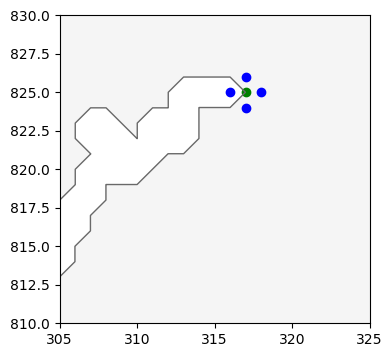

In [39]:
# zoom in on the point
fig, ax = plt.subplots(1,1,figsize=(4, 4))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the coast crash spot
ax.scatter([317],[825],c='g')
# the spots around it
ax.scatter([317],[824],c='b')
ax.scatter([317],[826],c='b')
ax.scatter([316],[825],c='b')
ax.scatter([318],[825],c='b')


ax.set_ylim([810,830])
ax.set_xlim([305,325])

In [40]:
print(data.h[825,316].values) # water 
print(data.h[825,317].values) # water?
print(data.h[825,318].values) # land
print(data.h[824,317].values) # land
print(data.h[826,317].values) # land

5.0
5.0
4.0
4.0
4.0


##### and another one

In [12]:
# remember, 1 = water, 0 = land
print(grid.mask_u[732,330])
print(grid.mask_v[732,330])
print(grid.mask_rho[732,330])
# all agree that its land

<xarray.DataArray 'mask_u' ()>
array(0.)
<xarray.DataArray 'mask_v' ()>
array(0.)
<xarray.DataArray 'mask_rho' ()>
array(0.)


In [14]:
data = xr.open_dataset('/data1/parker/LO_roms/cas6_v0_live/f2018.03.09/ocean_his_0004.nc')
#first the v below and above
print(np.max(np.abs(data.v[0,:,731,330])).values)
print(np.max(np.abs(data.v[0,:,733,330])).values)


#and then the u left and right
print(np.max(np.abs(data.u[0,:,732,329])).values)
print(np.max(np.abs(data.u[0,:,732,331])).values)
# the u to the left is sometimes a number instead of nan!

nan
nan
0.05305630341172218
nan


(320.0, 340.0)

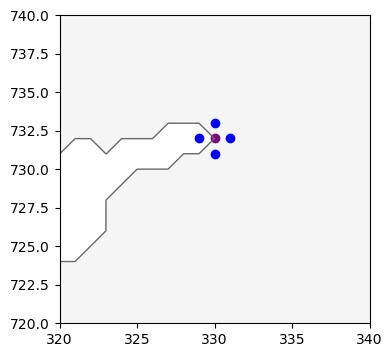

In [16]:
# zoom in on the point
fig, ax = plt.subplots(1,1,figsize=(4, 4))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the coast crash spot
ax.scatter([330],[732],c='purple')
# the spots around it
ax.scatter([330],[731],c='b')
ax.scatter([330],[733],c='b')
ax.scatter([331],[732],c='b')
ax.scatter([329],[732],c='b')


ax.set_ylim([720,740])
ax.set_xlim([320,340])

In [20]:
print(data.h[732,329].values) # water 
print(data.h[732,330].values) # water?
print(data.h[732,331].values) # land
print(data.h[731,330].values) # land
print(data.h[733,330].values) # land

5.0
5.0
4.0
4.0
4.0


##### final lil guy?

In [11]:
# remember, 1 = water, 0 = land
print(grid.mask_u[789,332])
print(grid.mask_v[789,332])
print(grid.mask_rho[789,332])
# all agree that its land

<xarray.DataArray 'mask_u' ()>
array(0.)
<xarray.DataArray 'mask_v' ()>
array(0.)
<xarray.DataArray 'mask_rho' ()>
array(0.)


In [15]:
data = xr.open_dataset('/data1/parker/LO_roms/cas6_v0_live/f2018.03.09/ocean_his_0004.nc')
#first the v below and above
print(np.max(np.abs(data.v[0,:,788,332])).values)
print(np.max(np.abs(data.v[0,:,790,332])).values)


#and then the u left and right
print(np.max(np.abs(data.u[0,:,789,331])).values)
print(np.max(np.abs(data.u[0,:,789,333])).values)
# the u to the left is sometimes a number instead of nan!

nan
nan
0.02834640070796013
nan


(320.0, 340.0)

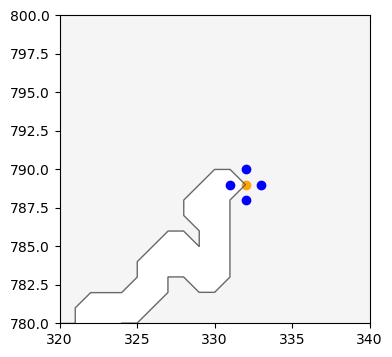

In [19]:
# zoom in on the point
fig, ax = plt.subplots(1,1,figsize=(4, 4))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the coast crash spot
ax.scatter([332],[789],c='orange')
# the spots around it
ax.scatter([331],[789],c='b')
ax.scatter([333],[789],c='b')
ax.scatter([332],[788],c='b')
ax.scatter([332],[790],c='b')


ax.set_ylim([780,800])
ax.set_xlim([320,340])

In [21]:
print(data.h[789,331].values) # water 
print(data.h[789,332].values) # water?
print(data.h[789,333].values) # land
print(data.h[788,332].values) # land
print(data.h[790,332].values) # land

5.0
5.0
4.0
4.0
4.0


##### nah we got one more

<xarray.DataArray 'mask_u' ()>
array(0.)
<xarray.DataArray 'mask_v' ()>
array(0.)
<xarray.DataArray 'mask_rho' ()>
array(0.)
nan
nan
0.0031342599540948868
nan


(243.0, 263.0)

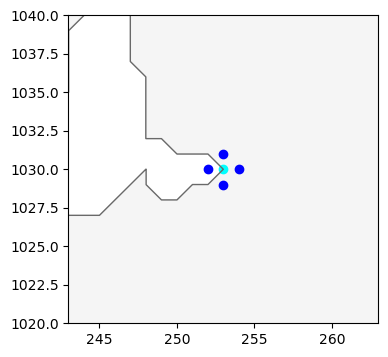

In [11]:
yval=1030
xval = 253

# remember, 1 = water, 0 = land
print(grid.mask_u[yval,xval])
print(grid.mask_v[yval,xval])
print(grid.mask_rho[yval,xval])
# all agree that its land

data = xr.open_dataset('/data1/parker/LO_roms/cas6_v0_live/f2018.03.09/ocean_his_0004.nc')
#first the v below and above
print(np.max(np.abs(data.v[0,:,yval-1,xval])).values)
print(np.max(np.abs(data.v[0,:,yval+1,xval])).values)

#and then the u left and right
print(np.max(np.abs(data.u[0,:,yval,xval-1])).values)
print(np.max(np.abs(data.u[0,:,yval,xval+1])).values)
# the u to the left is sometimes a number instead of nan!

# zoom in on the point
fig, ax = plt.subplots(1,1,figsize=(4, 4))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the coast crash spot
ax.scatter([xval],[yval],c='cyan')
# the spots around it
ax.scatter([xval-1],[yval],c='b')
ax.scatter([xval+1],[yval],c='b')
ax.scatter([xval],[yval-1],c='b')
ax.scatter([xval],[yval+1],c='b')


ax.set_ylim([yval-10,yval+10])
ax.set_xlim([xval-10,xval+10])

In [13]:
print(data.h[yval,xval-1].values) # water 
print(data.h[yval,xval].values) # water?
print(data.h[yval,xval+1].values) # land
print(data.h[yval-1,xval].values) # land
print(data.h[yval+1,xval].values) # land

8.301747156064879
5.0
4.0
4.0
4.0


#### definitely water too! 
## let's edit the grid file

In [14]:
grid.mask_rho[960,324], grid.mask_rho[825,317], grid.mask_rho[789,332], grid.mask_rho[732,330], grid.mask_rho[1030,253]  = 1,1,1,1,1
grid.mask_u[960,324], grid.mask_u[825,317], grid.mask_u[789,332], grid.mask_u[732,330], grid.mask_u[1030,253]  = 1,1,1,1,1
grid.mask_v[960,324], grid.mask_v[825,317], grid.mask_v[789,332], grid.mask_v[732,330], grid.mask_v[1030,253]  = 1,1,1,1,1
grid.mask_psi[960,324], grid.mask_psi[825,317], grid.mask_psi[789,332], grid.mask_psi[732,330], grid.mask_psi[1030,253]  = 1,1,1,1,1
grid.mask_psi_ex[960,324], grid.mask_psi_ex[825,317], grid.mask_psi_ex[789,332], grid.mask_psi_ex[732,330], grid.mask_psi_ex[1030,253]  = 1,1,1,1,1
grid.to_netcdf('/data1/bbeutel/LO_output/grid/grid.nc')